In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Mineração de textos

In [2]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import nltk
#nltk.download() (pode ser executado após instalar o nltk - pip install nltk)
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
#conda install -c conda-forge wordcloud (executar no Anaconda Prompt)
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/luciano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Criação de um corpus lendo textos do disco
corpus = PlaintextCorpusReader('/home/luciano/github/Treinamento_R_Python/Seção 40/dados/Arquivos/', '.*', encoding = "ISO-8859-1")

In [4]:
# Leitura dos arquivos do disco, percorrer os registros e mostrar o nome dos primeiros 100 arquivos
arquivos = corpus.fileids()
#primeiro arquivo
arquivos[0]

'1.txt'

In [5]:
#zero a 10
arquivos[0:10]

['1.txt',
 '10.txt',
 '100.txt',
 '1000.txt',
 '1001.txt',
 '1002.txt',
 '1003.txt',
 '1004.txt',
 '1005.txt',
 '1006.txt']

In [6]:
#imprime todos os nomes
for a in arquivos:
    print(a)

1.txt
10.txt
100.txt
1000.txt
1001.txt
1002.txt
1003.txt
1004.txt
1005.txt
1006.txt
1007.txt
1008.txt
1009.txt
101.txt
1010.txt
1011.txt
1012.txt
1013.txt
1014.txt
1015.txt
1016.txt
1017.txt
1018.txt
1019.txt
102.txt
1020.txt
1021.txt
1022.txt
1023.txt
1024.txt
1025.txt
1026.txt
1027.txt
1028.txt
1029.txt
103.txt
1030.txt
1031.txt
1032.txt
1033.txt
1034.txt
1035.txt
1036.txt
1037.txt
1038.txt
1039.txt
104.txt
1040.txt
1041.txt
1042.txt
1043.txt
1044.txt
1045.txt
1046.txt
1047.txt
1048.txt
1049.txt
105.txt
1050.txt
1051.txt
1052.txt
1053.txt
1054.txt
1055.txt
1056.txt
1057.txt
1058.txt
1059.txt
106.txt
1060.txt
1061.txt
1062.txt
1063.txt
1064.txt
1065.txt
1066.txt
1067.txt
1068.txt
1069.txt
107.txt
1070.txt
1071.txt
1072.txt
1073.txt
1074.txt
1075.txt
1076.txt
1077.txt
1078.txt
1079.txt
108.txt
1080.txt
1081.txt
1082.txt
1083.txt
1084.txt
1085.txt
1086.txt
1087.txt
1088.txt
1089.txt
109.txt
1090.txt
1091.txt
1092.txt
1093.txt
1094.txt
1095.txt
1096.txt
1097.txt
1098.txt
1099.txt
11.txt


In [7]:
# Acesso ao texto do primeiro arquivo
texto = corpus.raw('1.txt')
texto

"@relation 'Reuters-21578 Corn ModApte Train-weka.filters.unsupervised.attribute.NumericToBinary-weka.filters.unsupervised.instance.RemoveFolds-S0-N5-F1'\r\n"

In [8]:
# Acesso a todos as palavras de todos os arquivos do corpus
todo_texto = corpus.raw()
#todo_texto

In [9]:
# Obtenção de todas as palavras do corpus e visualização da quantidade
palavras = corpus.words()
#acessando pelo indíce
palavras[170]

'dividend'

In [10]:
#quantidade
len(palavras)

244913

In [11]:
# Usando o NLTK, obtemos as stop word em inglês
stops = stopwords.words('english')
#stops = stopwords.words('portuguese')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

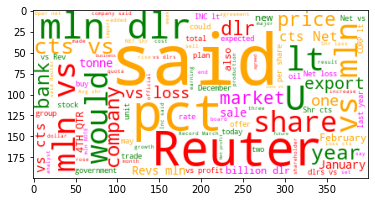

In [12]:
# Definição das cores que serão utilizadas na nuvem de palavras
mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])
# Criação da nuvem de palavras, com no máximo 100 palavras e utilizando as stop words
nuvem = WordCloud(background_color = 'white',
                  colormap = mapa_cores,
                  stopwords = stops,
                  max_words = 100)
# Criação e visualização da nuvem de palavras
nuvem.generate(todo_texto)
plt.imshow(nuvem)

In [13]:
# Criação de nova lista de palavras, removendo stop words
palavras_semstop = [p for p in palavras if p not in stops]
len(palavras_semstop)

189446

In [14]:
# Remoção da pontuação, gerando uma lista sem stop words e sem pontuação
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]
len(palavras_sem_pontuacao)

156687

In [15]:
# Cálculo da frequência das palavras e visualização das mais comuns
frequencia = nltk.FreqDist(palavras_sem_pontuacao)
frequencia

FreqDist({'said': 3398, 'mln': 2721, '3': 2228, 'vs': 2194, '0': 1949, 'dlrs': 1945, '1': 1661, '000': 1640, '&#': 1466, ";',": 1432, ...})

In [16]:
#mais comuns
mais_comuns = frequencia.most_common(100)
mais_comuns

[('said', 3398),
 ('mln', 2721),
 ('3', 2228),
 ('vs', 2194),
 ('0', 1949),
 ('dlrs', 1945),
 ('1', 1661),
 ('000', 1640),
 ('&#', 1466),
 (";',", 1432),
 ('The', 1429),
 ('cts', 1374),
 ('lt', 1286),
 ('Reuter', 1214),
 ('pct', 1146),
 ('2', 1001),
 ('year', 878),
 ('U', 833),
 ('loss', 800),
 ('S', 794),
 ('billion', 707),
 ('5', 674),
 ('1986', 666),
 ('would', 638),
 ('4', 633),
 ('company', 518),
 ('share', 513),
 ('6', 505),
 ('profit', 498),
 ('Net', 486),
 ('7', 469),
 ('Shr', 456),
 ('8', 440),
 ('March', 439),
 ('net', 401),
 ('9', 393),
 ('Revs', 392),
 ('one', 390),
 ('Inc', 385),
 ('last', 380),
 ('tonnes', 361),
 ('market', 357),
 ('also', 355),
 ('shares', 351),
 ('per', 347),
 ('two', 340),
 ('stock', 339),
 ('oil', 328),
 ('prices', 325),
 ('10', 315),
 ('1985', 309),
 ('QTR', 300),
 ('1987', 298),
 ('31', 295),
 ('It', 294),
 ('trade', 290),
 ('quarter', 284),
 ('Corp', 277),
 ('12', 272),
 ('January', 272),
 ('15', 271),
 ('April', 244),
 ('Oper', 244),
 ('TO', 240),